In [1]:
import gensim

model=gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
print(model['computer'].shape)

FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'

In [2]:
# Parse reviews
import nltk
import csv

train_data=[]
train_labels=[]
vali_data=[]
vali_labels=[]

with open('DSet/review_100k_train.csv','r') as f:
    data=csv.reader(f, delimiter=',')
    indic=False
    for line in data:
        if indic==True:
            train_data.append(line[5])
            train_labels.append(line[3])
        else:
            indic=True
        
with open('DSet/review_20k_valid.csv','r') as f:
    data=csv.reader(f, delimiter=',')
    indic=False
    for line in data:
        if indic==True:
            vali_data.append(line[5])
            vali_labels.append(line[3])
        else:
            indic=True

print(len(train_data))
print(len(vali_data))


99999
20000


In [3]:
# Tokenizing the words 
import numpy as np
import string

clean_train_data=[]
clean_vali_data=[]

for i in np.arange(len(train_data)):
    if i%10000==0:
        print('Curr iter is',i)
    toks=[word.strip(string.punctuation) for word in train_data[i].split()]
    toks2=[word for word in toks if word!='']
    clean_train_data.append(toks2)
    
for i in np.arange(len(vali_data)):
    toks=[word.strip(string.punctuation) for word in vali_data[i].split()]
    toks2=[word for word in toks if word!='']
    clean_vali_data.append(toks2)
    
print(len(clean_train_data))
print(len(clean_vali_data))

Curr iter is 0
Curr iter is 10000
Curr iter is 20000
Curr iter is 30000
Curr iter is 40000
Curr iter is 50000
Curr iter is 60000
Curr iter is 70000
Curr iter is 80000
Curr iter is 90000
99999
20000


In [ ]:
# Replace words with their word2vec rep
# word2vec_train is a 3d array [review_number, num_words, 300 dimensions of word2vec]
# removing words in reviews that do not occur in word2vec

word2vec_train=[]
word2vec_vali=[]

for i in np.arange(len(clean_train_data)):
    if i%5000==0:
        print('Curr iter is',i)
    review_mat=[]
    for j in np.arange(len(clean_train_data[i])):
        if clean_train_data[i][j] in model:
            review_mat.append(model[clean_train_data[i][j]].tolist())
    # zero padding?
    # write into file
    
    
#     word2vec_train.append(review_mat)
    
# word2vec_train=np.array(word2vec_train)
    
for i in np.arange(len(clean_vali_data)):
    review_mat=[]
    for j in np.arange(len(clean_vali_data[i])):
        if clean_vali_data[i][j] in model:
            review_mat.append(model[clean_vali_data[i][j]].tolist())
    # write into file
    
print('Done')

Curr iter is 0
Curr iter is 5000


In [ ]:
# Write into a file

In [1]:
print(1)

1


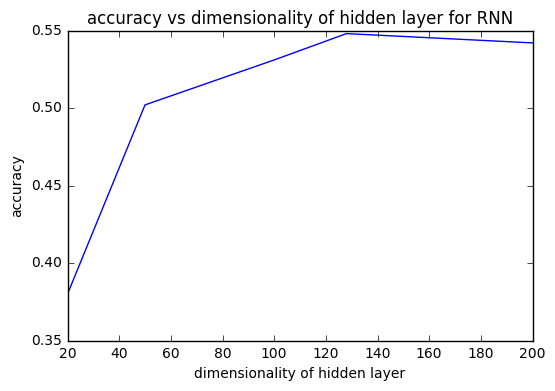

In [2]:
import matplotlib.pyplot as plt


accu = [0.380, 0.502, 0.531, 0.548, 0.542]
number = [20, 50, 100, 128, 200]
plt.plot(number,accu)
plt.xlabel('dimensionality of hidden layer')
plt.ylabel('accuracy')
plt.title('accuracy vs dimensionality of hidden layer for RNN')
plt.show()
